In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(23)
numbers = np.zeros((8, 2))
for i in range(8):
    numbers[i][0] = np.random.randint(0, 5)
    numbers[i][1] = np.random.randint(0, 5)
    while numbers[i][0] == numbers[i][1]:
        numbers[i][1] = np.random.randint(0, 5)

print('Мои номера пунктов:')
print(numbers)

Мои номера пунктов:
[[3. 0.]
 [1. 0.]
 [4. 3.]
 [2. 1.]
 [3. 4.]
 [1. 2.]
 [3. 0.]
 [4. 0.]]


In [2]:
df_appartments = pd.read_csv('appartments.csv')
df_cars = pd.read_csv('cars.csv')
df_people = pd.read_csv('people.csv')

### task_1
Обработать пропущенные значения:
#### d. Заменить медианой

In [3]:
df_indicator = df_appartments.isnull()
print('В каких столбцах есть пустые ячейки:')
df_indicator.any()

В каких столбцах есть пустые ячейки:


ID           False
ID_person    False
Square       False
Rooms         True
Price        False
dtype: bool

In [4]:
df_appartments_1d = df_appartments.copy()
df_appartments_1d['Rooms_indicator'] = df_indicator['Rooms']
df_appartments_1d['Rooms'] = df_appartments_1d['Rooms'].fillna(df_appartments_1d['Rooms'].median())
df_appartments_1d.to_csv('appartments_stage1_d.csv', index=False, header=True)

In [5]:
df_indicator = df_cars.isnull()
print('В каких столбцах есть пустые ячейки:')
df_indicator.any()

В каких столбцах есть пустые ячейки:


ID           False
ID_person    False
Model        False
Power         True
Price        False
dtype: bool

In [6]:
df_cars_1d = df_cars.copy()
df_cars_1d['Power_indicator'] = df_indicator['Power']
df_cars_1d['Power'] = df_cars_1d['Power'].fillna(df_cars_1d['Power'].median())
df_cars_1d.to_csv('cars_stage1_d.csv', index=False, header=True)

In [7]:
df_indicator = df_people.isnull()
print('В каких столбцах есть пустые ячейки:')
df_indicator.any()

В каких столбцах есть пустые ячейки:


ID            False
Name          False
Height         True
Weight         True
Age           False
Sex           False
Profession    False
Salary        False
dtype: bool

In [8]:
df_people_1d = df_people.copy()

df_people_1d['Height_indicator'] = df_indicator['Height']
df_people_1d['Weight_indicator'] = df_indicator['Weight']

df_people_1d['Height'] = df_people_1d['Height'].fillna(df_people_1d['Height'].median())
df_people_1d['Weight'] = df_people_1d['Weight'].fillna(df_people_1d['Weight'].median())

df_people_1d.to_csv('people_stage1_d.csv', index=False, header=True)

#### a. Удалить строки содержащие пропуски

In [9]:
df_appartments_1a = df_appartments.dropna()
df_appartments_1a.to_csv('appartments_stage1_a.csv', index=False, header=True)

In [10]:
df_cars_1a = df_cars.dropna()
df_cars_1a.to_csv('cars_stage1_a.csv', index=False, header=True)

In [11]:
df_people_1a = df_people.dropna()
df_people_1a.to_csv('people_stage1_a.csv', index=False, header=True)

### task_2
В таблицу people добавить один из следующих столбцов
#### b. числовой признак с количеством машин

In [12]:
df_cars_2b = df_cars.drop(['ID'], axis=1)
df_cars_2b = df_cars_2b.rename(columns={df_cars_2b.columns[0]: "ID"})

df_2b = pd.merge(df_people, df_cars_2b, on='ID', how='left')
df_2b = df_2b.groupby('ID').count()
df_people_2b = df_people.copy()
df_people_2b['Count of cars'] = df_2b['Model']
df_people_2b

,ID,Name,Height,Weight,Age,Sex,Profession,Salary,Count of cars
0,0,Горшков Бенедикт,186.0,78.0,71,м,продавец,310000,1
1,1,Суворов Эрик,182.0,117.0,80,м,сантехник,61000,1
2,2,Воронов Модест,192.0,55.0,27,м,преподаватель,266000,2
3,3,Гусев Макар,193.0,116.0,68,м,продавец,240000,0
4,4,Соболев Фёдор,165.0,84.0,67,м,автослесарь,226000,0
...,...,...,...,...,...,...,...,...,...
19995,19995,Пахомовa Леся,181.0,59.0,62,ж,преподаватель,332000,2
19996,19996,Буровa Зинаида,160.0,51.0,44,ж,сантехник,151000,3
19997,19997,Ларионовa Эвелина,179.0,69.0,30,ж,врач,46000,1
19998,19998,Симоновa Россияна,177.0,76.0,49,ж,инженер,421000,0


#### a.бинарный признак того, что у человека есть хотя бы одна машина

In [13]:
df_people_2a = df_people.copy()
df_2a = df_people_2b.drop(['ID', 'Name', 'Height', 'Weight', 'Age', 'Sex', 'Profession', 'Salary'], axis=1)
df_2a = df_2a.applymap(lambda col: col != 0)
df_people_2a['Binary sign of car'] = df_2a['Count of cars']
df_people_2a

,ID,Name,Height,Weight,Age,Sex,Profession,Salary,Binary sign of car
0,0,Горшков Бенедикт,186.0,78.0,71,м,продавец,310000,True
1,1,Суворов Эрик,182.0,117.0,80,м,сантехник,61000,True
2,2,Воронов Модест,192.0,55.0,27,м,преподаватель,266000,True
3,3,Гусев Макар,193.0,116.0,68,м,продавец,240000,False
4,4,Соболев Фёдор,165.0,84.0,67,м,автослесарь,226000,False
...,...,...,...,...,...,...,...,...,...
19995,19995,Пахомовa Леся,181.0,59.0,62,ж,преподаватель,332000,True
19996,19996,Буровa Зинаида,160.0,51.0,44,ж,сантехник,151000,True
19997,19997,Ларионовa Эвелина,179.0,69.0,30,ж,врач,46000,True
19998,19998,Симоновa Россияна,177.0,76.0,49,ж,инженер,421000,False


### task_3
Отсортировать таблицу cars из предыдущего задания (из 1 задания)
#### e. По стоимости по убыванию и после по мощности по возрастанию

In [14]:
df_cars_3e = df_cars_1a.sort_values(['Price'], ascending=False)
df_cars_3e = df_cars_3e.sort_values(['Power'])
df_cars_3e.to_csv('cars_stage3_e.csv', index=True, header=False)
df_cars_3e

,ID,ID_person,Model,Power,Price
1395,1395,5588,Subaru,70.0,1158234
3281,3281,6695,LADA,70.0,1550154
1427,1427,1311,KIA,70.0,2831036
7408,7408,3911,Infiniti,70.0,3690176
8686,8686,4663,Subaru,70.0,1630553
...,...,...,...,...,...
3871,3871,18604,LADA,499.0,2986329
3217,3217,15059,Mercedez-Benz,499.0,1965841
13895,13895,17910,KIA,499.0,3034687
12494,12494,8815,Audi,499.0,204509


#### d. По доходу владельца по убыванию

In [15]:
df = df_people.drop(['Name', 'Height', 'Weight', 'Age', 'Sex', 'Profession'], axis=1)
df_people_3d = df.rename(columns={df.columns[0]: "ID_person"})
df_cars_3d = pd.merge(df_cars_1a, df_people_3d, on='ID_person', how='left')
df_cars_3d = df_cars_3d.sort_values(['Salary'], ascending=False)
df_cars_3d = df_cars_3d.drop(['Salary'], axis=1)
df_cars_3d.to_csv('cars_stage3_d.csv', index=True, header=False)
df_cars_3d

,ID,ID_person,Model,Power,Price
8686,9579,5555,Daewoo,85.0,1575000
13122,14492,6452,Mercedez-Benz,451.0,3682014
11958,13229,17655,Ford,82.0,1864729
8850,9762,13807,Infiniti,123.0,528462
9236,10208,4259,Mercedez-Benz,406.0,2390068
...,...,...,...,...,...
10407,11492,6668,KIA,338.0,476346
10416,11502,9049,Mercedez-Benz,182.0,284264
5155,5673,1056,BMW,167.0,672753
11203,12393,9747,LADA,325.0,3781714


### task_4
#### c,d. Посчитать среднее кол-во стоимости машин для мужчин

In [16]:
df_people_4cd = df_people_2a.copy()
df_people_4cd = df_people_4cd[df_people_4cd['Sex'] == 'м']

In [17]:
# for task 6, point d
df_people_6d = df_people_4cd.drop(['Height', 'Weight', 'Age', 'Sex', 'Profession', 'Name', 'Binary sign of car'],
                                  axis=1)

In [18]:
df_people_4cd = df_people_4cd[df_people_4cd['Binary sign of car']]

df_people_4cd = pd.merge(df_people_4cd, df_cars_2b, on='ID', how='left')
df_people_4cd['Price'] = df_people_4cd['Price'].fillna(0)

In [19]:
print('Среднее кол-во стоимости машин для мужчин:')
df_people_4cd['Price'].mean()

Среднее кол-во стоимости машин для мужчин:


2109827.5683089215

#### b,e. Посчитать среднее кол-во квартир для молодых (до 35 лет) преподавателей

In [20]:
df_appartments_4be = df_appartments.drop(['ID'], axis=1)
df_appartments_4be = df_appartments_4be.rename(columns={df_appartments_4be.columns[0]: "ID"})

df_4be = pd.merge(df_people, df_appartments_4be, on='ID', how='left')
df_4be = df_4be.groupby('ID').count()

df_people_4be = df_people.copy()
df_people_4be['Count of appartments'] = df_4be['Square']

In [21]:
# for task 5, point b
df_people5b = df_people_4be.copy()

In [22]:
# for task 7, point e
d = {'Cars': [], 'Appartments': []}
df_people_7e = pd.DataFrame(data=d)
df_people_7e['Cars'] = df_people_2b['Count of cars']
df_people_7e['Appartments'] = df_people_4be['Count of appartments']

In [23]:
df_people_4be = df_people_4be[df_people_4be['Age'] <= 35]
df_people_4be = df_people_4be[df_people_4be['Profession'] == 'преподаватель']

In [24]:
print('Среднее кол-во квартир для молодых:')
df_people_4be['Count of appartments'].mean()

Среднее кол-во квартир для молодых:


0.3403141361256545

### task_5
#### b. Сохранить таблицу средних зарплат в зависимости от пола,профессии и количества квартир

In [25]:
df_people_5b = df_people5b.groupby(['Sex', 'Profession', 'Count of appartments']).agg({'Salary': np.mean})
df_people_5b

Salary
Sex Profession  Count of appartments               
ж   автослесарь 0                     253065.675341
                1                     258142.322097
                2                     249529.411765
                3                     309000.000000
                4                     196000.000000
...                                             ...
м   студент     0                     248856.613103
                1                     254084.210526
                2                     232061.224490
                3                     230000.000000
                4                     313000.000000

[80 rows x 1 columns]

#### c. Сохранить таблицу минимальных зарплат в зависимости от пола,профессии и количества машин

In [26]:
df_people_5c = df_people_2b.groupby(['Sex', 'Profession', 'Count of cars']).agg({'Salary': np.min})
df_people_5c

Salary
Sex Profession  Count of cars        
ж   автослесарь 0               10000
                1               12000
                2               11000
                3               28000
                4              143000
...                               ...
м   студент     1               11000
                2               14000
                3               10000
                4               77000
                5               79000

[108 rows x 1 columns]

### task_6
Построить гистограмму зарплат для
#### d. мужчин

Гистограмма зарплат для мужчин:


<AxesSubplot:xlabel='Salary', ylabel='Count'>

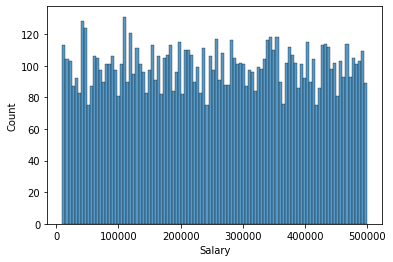

In [27]:
print('Гистограмма зарплат для мужчин:')
sns.histplot(data=df_people_6d, x="Salary", stat="count", bins=100)

График зарплат для мужчин:


<AxesSubplot:xlabel='Salary'>

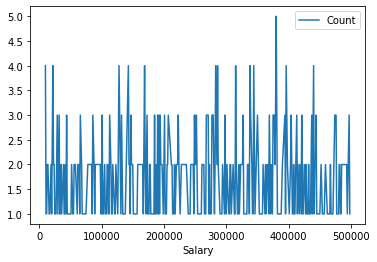

In [28]:
df_people_6d = df_people_4be.drop(['Name', 'Height', 'Weight', 'Age', 'Sex', 'Profession', 'Count of appartments'],
                                  axis=1)
df_people_6d = df_people_6d.groupby("Salary").count()
df_people_6d = df_people_6d.rename(columns={df_people_6d.columns[0]: "Count"})

print('График зарплат для мужчин:')
df_people_6d.plot()

#### a. пенсионеров (мужчин старше 65 и женщин старше 60)

Гистограмма зарплат для пенсионеров:


<AxesSubplot:xlabel='Salary', ylabel='Count'>

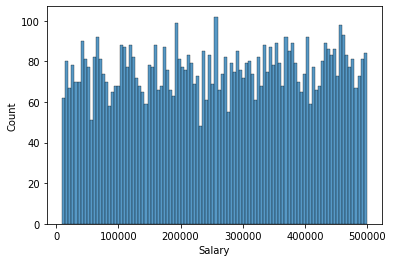

In [29]:
df_people_6a = df_people.copy()

df_man = df_people_6a[df_people_6a['Sex'] == 'м']
df_woman = df_people_6a[df_people_6a['Sex'] == 'ж']

df_man = df_man[df_man['Age'] >= 65]
df_woman = df_woman[df_woman['Age'] >= 60]
df_people_6a = pd.concat([df_man, df_woman])

print('Гистограмма зарплат для пенсионеров:')
sns.histplot(data=df_people_6a, x="Salary", stat="count", bins=100)

График зарплат для пенсионеров:


<AxesSubplot:xlabel='Salary'>

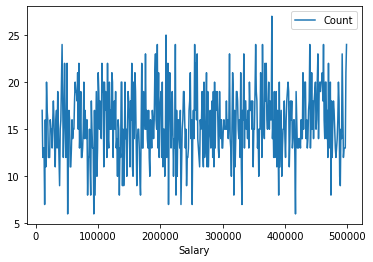

In [30]:
df_people_6a = df_people_6a.drop(['Name', 'Height', 'Weight', 'Age', 'Sex', 'Profession'], axis=1)
df_people_6a = df_people_6a.groupby("Salary").count()
df_people_6a = df_people_6a.rename(columns={df_people_6a.columns[0]: "Count"})

print('График зарплат для пенсионеров:')
df_people_6a.plot()

### task_7
Визуализировать
#### e. Кол-во машин в зависимости от кол-ва квартир

<AxesSubplot:xlabel='Appartments', ylabel='Cars'>

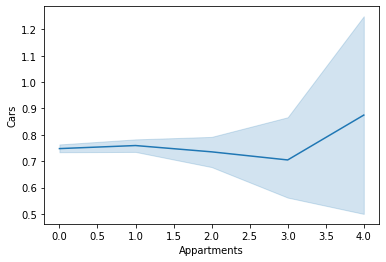

In [31]:
sns.lineplot(data=df_people_7e, x="Appartments", y="Cars")

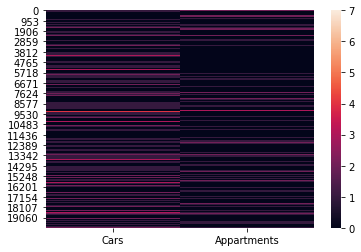

In [32]:
sns.heatmap(df_people_7e);

#### a. Зарплата в зависимости от возраста

<AxesSubplot:xlabel='Age', ylabel='Salary'>

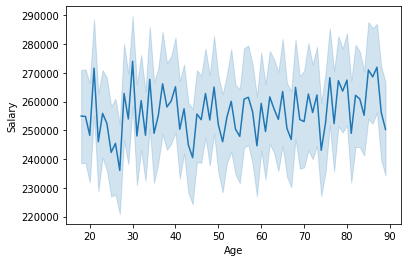

In [33]:
sns.lineplot(data=df_people, x="Age", y="Salary")
